In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

In [74]:
train_labels = pd.read_csv("../Data/train_labels.csv")
train_values = pd.read_csv("../Data/train_values.csv")
test_values = pd.read_csv("../Data/test_values.csv")

In [75]:
print(f"Train Values: {train_values.shape}")
print(f"Train Labels: {train_labels.shape}")
print(f"Test Values: {test_values.shape}")

Train Values: (260601, 39)
Train Labels: (260601, 2)
Test Values: (86868, 39)


#  Eliminating outliers from the quantitative attributes

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


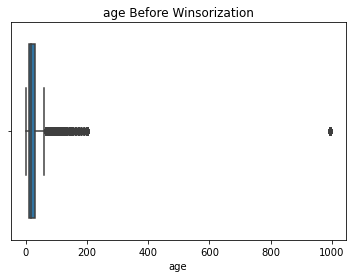

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


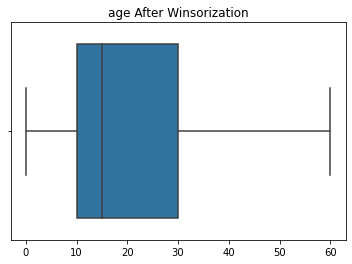

0         0.500000
1         0.166667
2         0.166667
3         0.166667
4         0.500000
            ...   
260596    0.916667
260597    0.000000
260598    0.916667
260599    0.166667
260600    0.166667
Name: age, Length: 260601, dtype: float64


In [76]:
#Data source
name = "age"
data = train_values[name]

#Before winsorization
sns.boxplot(data)
plt.title("{} Before Winsorization".format(name))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.05))

#After winsorization
sns.boxplot(winsorized_data)
plt.title("{} After Winsorization".format(name))
plt.show()

#Replace data in dataset
train_values[name] = (winsorized_data - winsorized_data.min())/(winsorized_data.max() - winsorized_data.min()) #with min-max normalization

print(train_values[name])

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


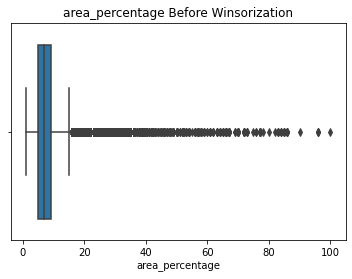

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


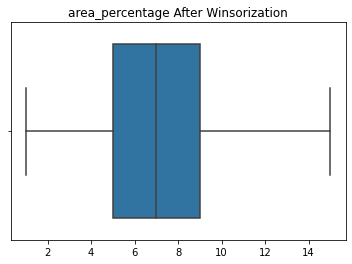

0         0.357143
1         0.500000
2         0.285714
3         0.357143
4         0.500000
            ...   
260596    0.357143
260597    0.357143
260598    0.357143
260599    0.928571
260600    0.428571
Name: area_percentage, Length: 260601, dtype: float64


In [77]:
#Data source
name = "area_percentage"
data = train_values[name]

#Before winsorization
sns.boxplot(data)
plt.title("{} Before Winsorization".format(name))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.055))

#After winsorization
sns.boxplot(winsorized_data)
plt.title("{} After Winsorization".format(name))
plt.show()

#Replace data in dataset
train_values[name] = (winsorized_data - winsorized_data.min())/(winsorized_data.max() - winsorized_data.min()) #with min-max normalization

print(train_values[name])

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


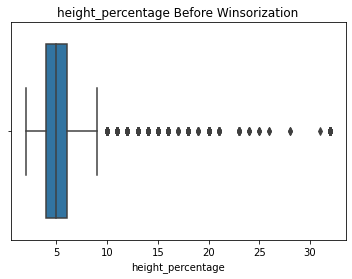

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


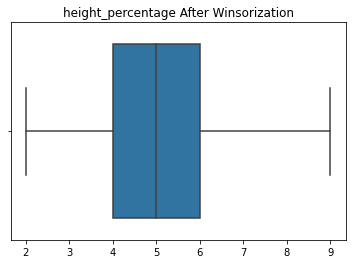

0         0.428571
1         0.714286
2         0.428571
3         0.428571
4         1.000000
            ...   
260596    0.142857
260597    0.428571
260598    0.714286
260599    0.571429
260600    0.571429
Name: height_percentage, Length: 260601, dtype: float64


In [78]:
#Data source
name = "height_percentage"
data = train_values[name]

#Before winsorization
sns.boxplot(data)
plt.title("{} Before Winsorization".format(name))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.04))

#After winsorization
sns.boxplot(winsorized_data)
plt.title("{} After Winsorization".format(name))
plt.show()

#Replace data in dataset
train_values[name] = (winsorized_data - winsorized_data.min())/(winsorized_data.max() - winsorized_data.min()) #with min-max normalization

print(train_values[name])

# Removing ID-s

In [79]:
train_values.drop(columns=["building_id"], inplace=True)
train_labels.drop(columns=["building_id"], inplace=True)

# One-hot-encoding

In [80]:
train_values = pd.get_dummies(train_values, drop_first = True)

# Checking correaltion between attributes

In [81]:
print(f"Train Values: {train_values.shape}")

Train Values: (260601, 60)


In [82]:
corr = train_values.corr()

In [83]:
corr

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
geo_level_1_id,1.000000,-0.061405,0.002718,-0.089364,-0.052075,0.061088,-0.072263,-0.018245,-0.152038,0.007677,...,0.001674,0.004048,0.000822,0.008179,0.009383,0.008559,0.033052,0.007874,-0.082055,0.004646
geo_level_2_id,-0.061405,1.000000,0.000921,0.047730,0.032917,-0.033234,0.038576,0.015833,0.076491,-0.008743,...,0.000590,-0.007971,0.000415,-0.005786,-0.004326,-0.005928,-0.025532,-0.027011,0.023189,0.013579
geo_level_3_id,0.002718,0.000921,1.000000,-0.021646,-0.005122,-0.002703,-0.020083,-0.015732,0.026294,0.019579,...,-0.001072,-0.005090,0.003123,-0.002804,0.001895,-0.003399,0.003240,-0.001309,-0.018533,-0.013100
count_floors_pre_eq,-0.089364,0.047730,-0.021646,1.000000,0.279047,0.112187,0.771407,0.174852,-0.027116,-0.041058,...,0.003528,0.015891,0.002651,0.001148,-0.033170,-0.003314,-0.004863,-0.008236,0.073273,0.007046
age,-0.052075,0.032917,-0.005122,0.279047,1.000000,-0.024180,0.208124,0.200320,0.057114,0.011131,...,-0.001687,0.012594,-0.002119,-0.000753,-0.016193,-0.005693,-0.016420,-0.003019,0.061490,0.013893
area_percentage,0.061088,-0.033234,-0.002703,0.112187,-0.024180,1.000000,0.208996,0.036227,-0.209937,0.002867,...,0.002145,0.007720,0.002096,0.022434,0.014418,0.018692,0.097150,-0.020128,0.034151,-0.002105
height_percentage,-0.072263,0.038576,-0.020083,0.771407,0.208124,0.208996,1.000000,0.161975,-0.067415,-0.019615,...,0.004291,0.010340,0.001962,0.004538,-0.019714,0.000170,0.003610,-0.010207,0.069292,0.002005
has_superstructure_adobe_mud,-0.018245,0.015833,-0.015732,0.174852,0.200320,0.036227,0.161975,1.000000,-0.306861,0.006962,...,0.001543,0.005002,-0.001530,-0.002785,0.017312,0.005313,0.019020,0.025108,-0.004681,0.033165
has_superstructure_mud_mortar_stone,-0.152038,0.076491,0.026294,-0.027116,0.057114,-0.209937,-0.067415,-0.306861,1.000000,-0.034046,...,0.000233,-0.013597,0.000035,-0.020852,-0.050911,-0.017476,-0.098556,-0.047872,0.126641,-0.003726
has_superstructure_stone_flag,0.007677,-0.008743,0.019579,-0.041058,0.011131,0.002867,-0.019615,0.006962,-0.034046,1.000000,...,-0.001733,0.000667,-0.000532,0.005583,0.011763,0.003543,-0.009556,-0.004939,0.005545,0.005245


In [84]:
type(corr)

pandas.core.frame.DataFrame

In [85]:
corr_temp = corr.where(np.abs(corr)>0.85, 0)
val = np.sum(np.sum(corr_temp))-60
print(val)

0.0


In [86]:
# Since there is no higher correlation, than 85% I am not deleting anything

In [88]:
train_values.shape

(260601, 60)

In [89]:
train_values.to_csv("../Data/train_values_preprocessed.csv")

In [93]:
train_labels.to_csv("../Data/train_labels_preprocessed.csv")